
# Investigate TMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains informationa about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

[Kaggle summary](https://www.kaggle.com/tmdb/tmdb-movie-metadata)
>What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

In [1]:
# Import statement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for showing graphs inside the same window
%matplotlib inline
# for setting decimal places while diplaying dataframe numbers
pd.options.display.float_format = "{:.2f}".format


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading the data
file_name = 'tmdb-movies.csv'
df = pd.read_csv(file_name)

In [3]:
# Exploring the data
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# checking for null values in each columns
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


**Columns Description**

|Columns|Description|
|:---|:---|
|imdb_id:|ID in IMDB site|
|popularity|Metric to help boost search results based on votes, vies, favorites, and votes|
|budget|Budget spent on movie when it's made|
|revenue|Revenue for the movie when it's released|
|original_title|Movie Name|
|cast|Cast members|
|homepage|Movie site|
|director|Movie Director|
|tagline|Movie tagline|
|keywords|Movie keywords|
|overview|Brief movie description|
|runtime|Movie duration in minutes|
|genres|Movie genre/s|
|production_companies|Production company/ies|
|release_date|release date (mm/dd/yy)|
|vote_count|number of voters|
|vote_average|Avg vote (10 point score)|
|release_year|Realse year (dddd)|
|budget_adj|Budget spent on movie in terms of 2010 dollars, accounting for inflation overtime|
|revenue_adj|Revenue for the movie in terms of 2010 dollars, accounting for inflation overtime|


### Checking for Issues

In [7]:
# Checking dulicate rows
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,30000000.00,967000.00


In [8]:
df[df.id==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,30000000.00,967000.00
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,30000000.00,967000.00


In [380]:
# Checking for invalid values
df[df.runtime==0].sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.88,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.40,2015,0.00,0.00
4829,110490,tt1910605,0.14,0,0,Rags,Keke Palmer|Avan Jogia|Drake Bell|Burkely Duff...,NaN,Bille Woodruff,NaN,...,"Rags follows the story of Charlie Prince, an o...",0,TV Movie|Comedy|Drama,NaN,5/28/12,24,5.70,2012,0.00,0.00
1289,286372,tt1791681,0.04,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.40,2014,2993545.92,0.00


In [10]:
df[df.runtime>200].sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9666,40724,tt0092571,0.30,0,0,Anne of Avonlea,Colleen Dewhurst|Patricia Hamilton|Megan Follo...,NaN,Kevin Sullivan,NaN,...,"Anne Shirley, now a schoolteacher, has begun w...",230,Drama|Romance|Family,NaN,5/19/87,17,7.40,1987,0.00,0.00
5163,192936,tt0287839,0.21,20000000,0,Frank Herbert's Children of Dune,Alec Newman|Susan Sarandon|James McAvoy|Julie ...,NaN,Greg Yaitanes,Born to rule an empire. Destined to tear it ap...,...,"The twins of Paul ""Muad'dib"" Atreides become e...",248,Drama|Science Fiction|Fantasy|Adventure,New Amsterdam Entertainment|Blixa Film Product...,3/25/03,35,6.50,2003,23707052.90,0.00
9867,45267,tt0055805,0.24,126,0,Boccaccio '70,Marisa Solinas|Germano Gilioli|Anita Ekberg|So...,NaN,Vittorio De Sica|Federico Fellini|Luchino Visc...,The First 3-Act Motion Picture Ever Presented!,...,Four directors tell tales of Eros fit for a 19...,208,Fantasy|Drama|Comedy|Romance|Foreign,Cineriz,2/22/62,12,6.50,1962,908.26,0.00
3141,54102,tt0995832,0.34,0,0,Generation Kill,Alexander SkarsgÃ¥rd|James Ransone|Lee Tergese...,NaN,Susanna White|Simon Cellan Jones,The New Face Of American War,...,Marines prepare to invade Iraq at the beginnin...,470,Drama|War|History,Company Pictures,7/13/08,28,6.60,2008,0.00,0.00
559,373977,tt4146128,0.03,0,0,Childhood's End,Mike Vogel|Osy Ikhile|Daisy Betts|Georgina Hai...,NaN,Nick Hurran,NaN,...,"After peaceful aliens invade earth, humanity f...",246,Thriller|TV Movie|Science Fiction|Drama,NaN,12/14/15,21,6.20,2015,0.00,0.00


In [11]:
df[df.runtime==900]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.01,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.20,2011,0.00,0.00


In [12]:
# Checking the max number of genres per movie
max(df.genres.str.count('\|')+1)

5.0

In [13]:
# Checking the min number of genres per movie
min(df.genres.str.count('\|')+1)

1.0

In [14]:
# Checking the max number of cast member per movie
max(df.cast.str.count('\|')+1)

5.0

In [15]:
# Checking the min number of cast member per movie
min(df.cast.str.count('\|')+1)

1.0

### Data Cleaning

**Data issues**
- Remove redundant columns, 20 columns are too much to explore
- Drop duplicated row (1)
- Solve runtime, revenue, budget 0 values
- Genres column have multiple values in one cell

In [16]:
# copy of original dataframe
df_clean = df.copy()

#### Remove redundant columns

In [17]:
df_clean.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [18]:
drop_columns = ['imdb_id', 'popularity','budget', 
                'revenue', 'cast', 'homepage', 
                'director', 'tagline', 'keywords', 
                'overview', 'release_date', 'vote_count']
df_clean.drop(drop_columns, axis=1, inplace=True)

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   original_title        10866 non-null  object 
 2   runtime               10866 non-null  int64  
 3   genres                10843 non-null  object 
 4   production_companies  9836 non-null   object 
 5   vote_average          10866 non-null  float64
 6   release_year          10866 non-null  int64  
 7   budget_adj            10866 non-null  float64
 8   revenue_adj           10866 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 764.1+ KB


#### Drop duplicated row

In [20]:
df_clean.duplicated().sum()

1

In [21]:
df_clean.drop_duplicates(inplace=True)

In [22]:
df_clean.duplicated().sum()

0

#### Solve runtime, revenue_adj, budget_adj low values

**runtime**  
only 0 runtime will be addressed, as this clearly missing info.  
other small values are most likely true

In [23]:
df_clean[df_clean.runtime==0].id.count()

31

In [24]:
# runtime with 0 value is so low, it can be safely dropped
df_clean = df_clean[df_clean.runtime!=0]

In [25]:
df_clean[df_clean.runtime==0].id.count()

0

**budget_adj**  
all low budget values will be replaced with np.nan as it's illogical and are skewing the statistical measures too much. 

In [26]:
df_clean[df_clean.budget_adj < 1000].id.count()

5726

In [27]:
df_clean.loc[30]

id                                                                 280996
original_title                                                 Mr. Holmes
runtime                                                               103
genres                                                      Mystery|Drama
production_companies    BBC Films|See-Saw Films|FilmNation Entertainme...
vote_average                                                         6.40
release_year                                                         2015
budget_adj                                                           0.00
revenue_adj                                                   27006774.88
Name: 30, dtype: object

In [28]:
df_clean.describe()

,id,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10834.00,10834.00,10834.00,10834.00,10834.00,10834.00
mean,65750.13,102.36,5.98,2001.30,17598956.85,51515987.09
std,91819.99,30.95,0.94,12.82,34344214.71,144818992.37
min,5.00,2.00,1.50,1960.00,0.00,0.00
25%,10586.25,90.00,5.40,1995.00,0.00,0.00
50%,20551.00,99.00,6.00,2006.00,0.00,0.00
75%,75055.00,112.00,6.60,2011.00,20942458.66,33896668.98
max,417859.00,900.00,9.20,2015.00,425000000.00,2827123750.41


In [29]:
# low revenue and budget values are too much to be dropped, will be filled with NA
# Leaving it 0 affect the average and min values
df_clean['budget_adj'] = df_clean['budget_adj'].apply(lambda x: np.nan if x<1000 else x)

In [30]:
df_clean.budget_adj.count()

5108

In [31]:
df_clean[df_clean.budget_adj < 0].id.count()

0

**revenue**  
same as budget, but will adress 0 values only, as some movies might actually produce revenue so small (<1000 USD)

In [32]:
df_clean[df_clean.revenue_adj == 0].id.count()

5985

In [33]:
df_clean['revenue_adj'].replace(0, np.nan, inplace=True)

In [34]:
df_clean.describe()

,id,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10834.00,10834.00,10834.00,10834.00,5108.00,4849.00
mean,65750.13,102.36,5.98,2001.30,37327151.85,115100887.63
std,91819.99,30.95,0.94,12.82,42017548.78,198855667.98
min,5.00,2.00,1.50,1960.00,1307.35,2.37
25%,10586.25,90.00,5.40,1995.00,8608686.39,10465848.09
50%,20551.00,99.00,6.00,2006.00,23088908.00,43956661.16
75%,75055.00,112.00,6.60,2011.00,50456518.10,131648235.91
max,417859.00,900.00,9.20,2015.00,425000000.00,2827123750.41


#### Genres splitting
Split genres values into multiple rows, split into a new dataframe and preserve the original format

In [35]:
df_genres = df_clean.copy()

In [36]:
df_genres = df_genres.assign(genres=df_genres.genres.str.split('|')).explode('genres')

In [37]:
df_genres.head()

,id,original_title,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,135397,Jurassic World,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6.50,2015,137999939.28,1392445892.52
0,135397,Jurassic World,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6.50,2015,137999939.28,1392445892.52
0,135397,Jurassic World,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6.50,2015,137999939.28,1392445892.52
0,135397,Jurassic World,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.50,2015,137999939.28,1392445892.52
1,76341,Mad Max: Fury Road,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,7.10,2015,137999939.28,348161292.49


**Saving the dataframe**

In [38]:
file_name = 'tmdb_movies_cleaned.csv'
df_clean.to_csv(file_name, encoding = 'utf-8', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [39]:
df_clean.describe()

,id,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10834.00,10834.00,10834.00,10834.00,5108.00,4849.00
mean,65750.13,102.36,5.98,2001.30,37327151.85,115100887.63
std,91819.99,30.95,0.94,12.82,42017548.78,198855667.98
min,5.00,2.00,1.50,1960.00,1307.35,2.37
25%,10586.25,90.00,5.40,1995.00,8608686.39,10465848.09
50%,20551.00,99.00,6.00,2006.00,23088908.00,43956661.16
75%,75055.00,112.00,6.60,2011.00,50456518.10,131648235.91
max,417859.00,900.00,9.20,2015.00,425000000.00,2827123750.41


### What is the correlation between vote, budget, and revenue

In [359]:
df_var = df_clean.copy()
df_var.drop(['id', 'release_year', 'original_title', 'production_companies', 'genres'], axis=1, inplace=True)

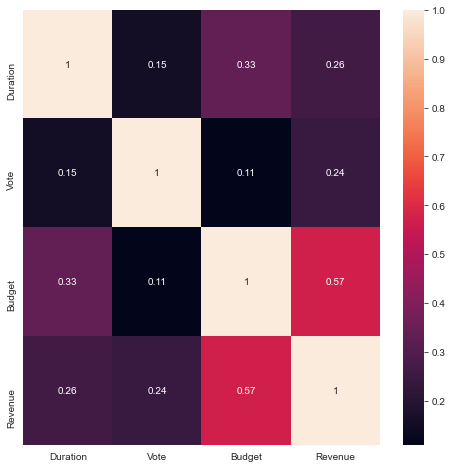

In [360]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df_var.corr(), annot=True,
            xticklabels=['Duration', 'Vote', 'Budget', 'Revenue'], yticklabels=['Duration', 'Vote', 'Budget', 'Revenue'])
plt.show()

**Analysis**  
- the strongest correlation among the variables is found between the budget and the revenue
- A weaker correlation is found between revenue and both duration and vote
- Almost no correlation between vote and both duration and budget. 

### Impact of voting score on revenue

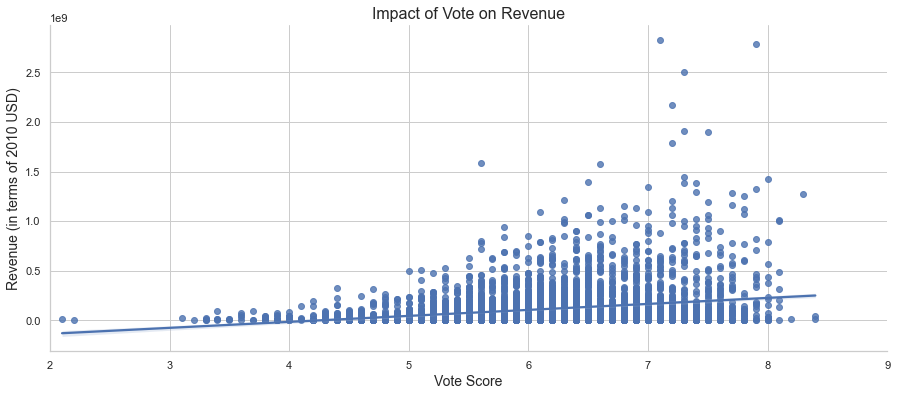

In [379]:
plt.subplots(figsize = (15,6))
sns.regplot(data=df_clean, x='vote_average', y = 'revenue_adj')
plt.xlabel('Vote Score', size=14)
plt.ylabel('Revenue (in terms of 2010 USD)', size=14)
plt.title('Impact of Vote on Revenue', size=16)
plt.xticks(ticks=[2,3,4,5,6,7,8,9])
sns.despine()
plt.show()

### What's the distribution of genres
What genres have significant more releases compared to the overall number of releases. 

In [40]:
genre_names=df_genres.genres.value_counts().index.str.title()
genre_count=df_genres.genres.value_counts().values
genre_percent = genre_count/(genre_count.sum())

In [41]:
explode_v = np.array(0.05).repeat(len(genre_names))

In [42]:
labels = ['{} - {:.1%}'.format(i,j) for i,j in zip(genre_names, genre_percent)]

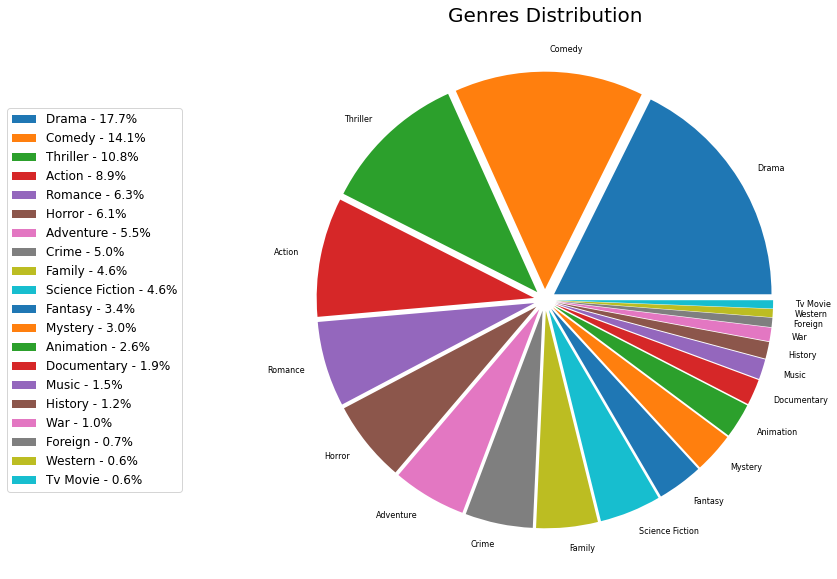

In [43]:
plt.figure(figsize=(10,10))
plt.pie(genre_count, labels=genre_names, explode = explode_v, textprops={'fontsize': 8})
plt.title('Genres Distribution').set_fontsize(20)
plt.legend(labels, loc='center left', fontsize=12, bbox_to_anchor=(-0.5, 0.5))
plt.show()

**Analysis**  
Out of 20 genre, only 4 genres (Drama, Comedy, Thriller, Action) represent more than half of released movies for the studied period (1960 to 2015)

### How did the top 4 genres change through the years

In [44]:
gp_1 = df_genres.groupby(['genres', 'release_year'])

In [45]:
select_gen = ['Drama', 'Comedy', 'Thriller', 'Action']
df_new = pd.DataFrame(gp_1.count().id.reset_index()).rename(columns={'genres': 'Genres'
                                                                   , 'release_year': 'Release'
                                                                   , 'id': 'Count'})
df_new = df_new[df_new.Genres.apply(lambda x: True if x in select_gen else False)]

In [46]:
df_act = df_new[df_new.Genres=='Action'].drop('Genres', axis=1)
df_com = df_new[df_new.Genres=='Comedy'].drop('Genres', axis=1)
df_dra = df_new[df_new.Genres=='Drama'].drop('Genres', axis=1)
df_thr = df_new[df_new.Genres=='Thriller'].drop('Genres', axis=1)

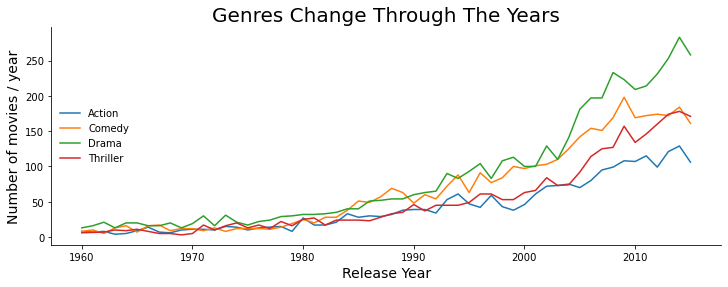

In [47]:
f, ax = plt.subplots(figsize=(12, 4))
df_act.plot(kind='line', x='Release',y='Count', label='Action',ax=ax)
df_com.plot(kind='line', x='Release',y='Count', label='Comedy',ax=ax)
df_dra.plot(kind='line', x='Release',y='Count', label='Drama',ax=ax)
df_thr.plot(kind='line', x='Release',y='Count', label='Thriller',ax=ax)
plt.title('Genres Change Through The Years').set_fontsize(20)
plt.xlabel('Release Year', size=14)
plt.ylabel('Number of movies / year',  size=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.legend(ncol=1, frameon=False, loc='center left')
plt.show()

**Analysis**  
Out of the top 4 genres:
- Drama saw a significant increase in numbers over the years, going from ~20 movies uo to more than 250 movie in 2015
- Thriller and Comedy had a moderate rise and are similar in numbers, starting from ~10 and ending with ~180 movie per year
- Action movies had the least growth, from 8 movies in 1960 to over 100 movies in 2015

### Genre effect on revenue in last year

In [48]:
gp_2=df_genres.groupby(['release_year', 'genres'])

In [49]:
df_new2 = pd.DataFrame(gp_2.mean().revenue_adj.reset_index()).rename(columns={'genres': 'Genres',
                                                                              'release_year': 'Release',
                                                                              'revenue_adj': 'Revenue'})
df_new2 = df_new2[df_new2.Release == 2015]
df_new2=df_new2.sort_values(by=['Revenue'], ascending=False).dropna()

In [50]:
f_labels = ['50M', '100M', '150M', '200M', '250M', '300M', '350M']
f_ticks = [50000000, 100000000, 150000000, 200000000, 250000000, 300000000, 350000000]

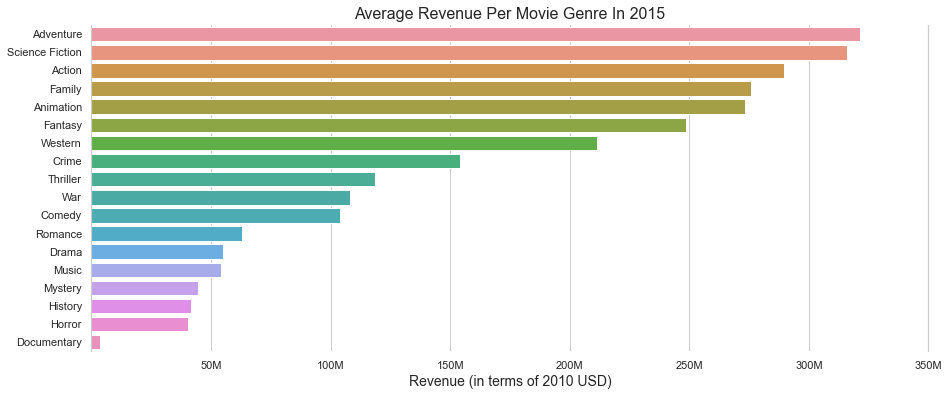

In [377]:
plt.subplots(figsize = (15,6))
sns.barplot(data =df_new2,  x='Revenue', y='Genres')
sns.set_style('whitegrid')
plt.xlabel('Revenue (in terms of 2010 USD)', size=14)
plt.ylabel('')
plt.title('Average Revenue Per Movie Genre In 2015', size=16)
plt.xticks(labels=f_labels, ticks= f_ticks)
sns.despine(bottom=True, right=False)
plt.show()

**Analysis**  
- Surprisngly, none of the 4 most common genres hold the best average revenue
- Best average revenue for a movie in 2015 was for the adventure movies
- Documentry movies have an underwhelming revenue with less than 10 Million USD

**Analysis**  
- Voting has a clear corelation with revenue, higher voted movies yielded a higher revenue.
- The highest revenue was not for the highest rated movies, but was for movies rated between 7 to 8.5.

<a id='conclusions'></a>
## Conclusions
**Analysis**  
This investigation is perfomed to analyze different aspects of movie release through the period of 1960 to 2015. After addressing some minor issue with the quality of the data, the analysis focused on two main variables: revenue and genres.
- Between vote, duration, budget and revenue, the strongest correletion is between the budget and the revenue.  
- Also, vote had a steady and moderate impact on revenue.  
- Through the last 55 years, four major genres dominated the market in terms of number of releases. Drama, Comedy, Thriller, and Action constitute more than 50% of movie releases through the studied period.  
- Drama also had a significant increase in movie releases over the years, up to more than 250 movie in 2015.  
- Although the high nummber of releases and significant growth in Drama, this genre did poorly in revenues and was not among the top genres to produce income. The best average revenue for a genre in 2015 was for the Adventure movies.  
  
**Limitations**  
- The provided dataset doesn't include every movie released in the studied period. So, the missing movies might actually cause a major change the average vote or revenue.
- The popularity column in the initial data provided was too abigious to include in the analysis.
- More than half the entries have no values for revenue and budget, this greatly reduces the accuracy of the results.
- [(From the kaggle page)](https://www.kaggle.com/tmdb/tmdb-movie-metadata) Are the budgets and revenues all in US dollars? Do they consistently show the global revenues?
- The revenues that show cumulative worldwide gross doesn't show how much is domestic and how much is foreign, some movies might do better in USA than in the rest of the world, and others might gain more revenue worldwide.
- Revenue is calculated based on box office profit, it doesn't include the profit from selling the movie through streaming services. This could affect the revenue especially in the recent years starting from 2010.  